**Tervetuloa!**

Upeaa että olet kiinnostunut data-analytiikasta ja Aalto Juniorin työpajasta. Toivottavasti tämä työpaja innostaa sinua lisää analytiikan, tilastotieteen ja ohjelmoinnin pariin!

**Alkuvalmistelut**

Kirjaudu sisään Google-tunnuksellasi ja mene osoitteeseen https://colab.research.google.com/. Kun sinulle aukeaa kuvan mukainen ikkuna, klikkaa oikeassa alakulmassa "NEW NOTEBOOK"-painiketta.

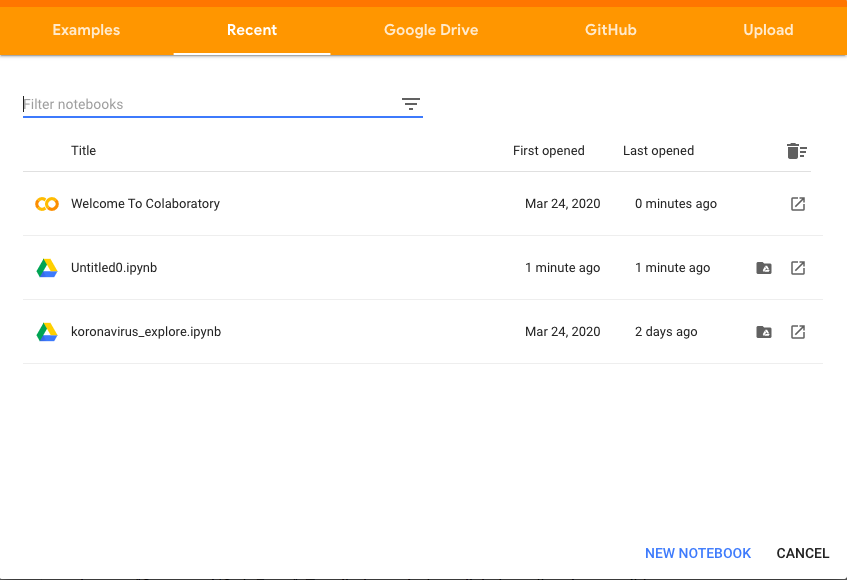

**Data**

Data-analyysiin tarvitaan koottua tietoa eli dataa. Se voi olla monenlaisessa muodossa, kuten taulukkona, tekstinä, äänenä tai kuvina. Data voi olla staattista tai jatkuvasti päivittyvää. Käytämme analyysissä EU:n julkaisemaa viikoittain päivittyvää taulukkomuotoista [avointa dataa](https://data.europa.eu/euodp/fi/data/dataset/covid-19-coronavirus-data/resource/260bbbde-2316-40eb-aec3-7cd7bfc2f590) koko maailman COVID-19-tapauksista. Sen [lisenssi](https://creativecommons.org/licenses/by/4.0/deed.fi) mahdollistaa meille sen vapaan käytön. Data-analyysiä tehtäessä on tärkeää aina varmistaa käytetyn datan käyttöoikeudet. 

Tässä työssä saat datan valmiiksi hyvässä ja käytettävässä muodossa. Näin voit keskittyä vain analyysiin ja johtopäätösten tekemiseen, eikä sinun tarvitse juuri siivota tai kerätä dataa itse.

Data voidaan ladata eri tiedostomuodoissa. Tässä työssä käytetty data on csv-muodossa. Csv-muotoon voit halutessasi tutustua tarkemmin [täällä](https://fi.wikipedia.org/wiki/CSV). Datasta saadaan selville viikko- ja maakohtaisesti uudet COVID-19-tapaukset sekä taudista seuranneet kuolemat. Lisäksi siitä saadaan selville kunkin maan väkiluku ja maanosa. Tämä mahdollistaa maanosakohtaisen tarkastelun suhteutettuna maan väkilukuun.

**Itse ohjelmointiin**

Pythonille on saatavilla lukuisia eri kirjastoja. Niiden avulla voidaan saada lisää hyödyllisiä komentoja ja ominaisuuksia. Tässä käytämme muun muassa pandas-kirjastoa, joka mahdollistaa datan esittämisen pandas.DataFrame-muodossa ja hyödyllisiä operaatioita kyseisessä muodossa olevalle datalle. Käytetty data on nyt csv-muodossa eli aloitetaan muuttamalla data tähän haluttuun muotoon.

Koodi on tässä työssä pääosin kirjoitettu valmiiksi. Voit itse kopioida tähän kirjoitettuja koodirivejä ja ajaa niitä omassa tiedostossasi "koodilaatikko" kerrallaan Shift+Enter-näppäilyllä. Kokeile myös rohkeasti opittuja komentoja ja menetelmiä uudella tavalla.

**Dataan tutustuminen**

Aloitetaan ensin tutustumalla itse dataan.

In [ ]:
#Tuodaan pandas-kirjasto
import pandas
pandas.options.mode.chained_assignment = None
#Saadaan EU:n verkkosivuilta linkki, jolla päästään käsiksi dataan ja tallennetaan linkki linkki-muuttujaan.
linkki = 'https://opendata.ecdc.europa.eu/covid19/casedistribution/csv'
#Käytetään pandas-kirjaston read_csv-komentoa, jolla voidaan tuoda linkin csv-muotoinen data pandas.DataFrame-muotoon.
data=pandas.read_csv(linkki)

In [ ]:
#pandas-kirjaston head()-komennolla näyttää muutaman ensimmäisen rivin ja näin saadaan yleiskuva datasta.
data.head()

In [ ]:
#Samoin voidaan tulostaa koko data. Ohjelmointiympäristö tulostaa onneksi vain pari ensimmistä ja viimeistä riviä.
data
# Millaista data on? Kuinka monta riviä siinä on? Entä mitä tietoa kukin sarake sisältää?

In [ ]:
'''
Esimerkki: Haetaan datasta kaikki Ruotsin rivit. Ruotsin geoID on "SE".
'''
#Tallennetaan muuttujaan data_ruotsi kaikki Ruotsin rivit
data_ruotsi = data.loc[data['geoId']=='SE'] 
#Tulostetaan data
data_ruotsi
#Koska työn tarkoituksena on tarkastella Suomen COVID-19-dataa, hae datasta Suomen rivit. Suomen geoId on "FI". Mitä eroavaisuuksia huomaat
#koko maailman dataan verrattuna? Entä verrattuna Ruotsin dataan?

**Visualisoidaan dataa**

Seuraavaksi pääset luomaan kuvaajia tämän datan pohjalta. Hyödyllinen Python-kirjasto tähän on matplotlib.

In [ ]:
#Tuodaan matplotlib-kirjasto ja käytetään siitä koodissa lyhennettä plt.
import matplotlib.pyplot as plt
#Luodaan kuvaajalle valmis alue figure-komennolla ja määritellään sille koko.
plt.figure(figsize=(16,10))
#Luodaan kuvaaja plot-komennolla kaikista Ruotsin tapauksista punaisella värillä ("r").
plt.plot(data_ruotsi.dateRep, data_ruotsi.cases_weekly, color="r")
#Luodaan kuvaaja plot-komennolla kaikista Ruotsin koronaviruskuolemista mustalla värillä ("k").
plt.plot(data_ruotsi.dateRep, data_ruotsi.deaths_weekly, color="k")
#Luo vastaavalla tavalla kuvaaja myös Suomen datasta. Mitä huomaat kuvaajasta? Mitä heikkouksia sillä on? Entä vahvuuksia?

Kuten huomaat kuvasta, data sisältää myös kaikki nollarivit (oikealla kuvaajassa vaakasuorat viivat) ja huomaamme ylhäällä olevista taulukoista, että dataa Ruotsin osalta on 6.1.2020 asti, jolloin Suomessa eikä Ruotsissa ollut vielä COVID-19-tapauksia. Datassa myös ensimmäiset rivit ovat uusimpia tapauksia, joten kuvaajassakin voit huomata tapausten vähenevän oikealle mentäessä. Päivämääriä on myös niin paljon, ettei niitä voida lukea kuvaajasta. Lähdetään siis kehittämään visualisointia!

Huomataan, että ensimmäinen tautitapaus Ruotsissa on havaittu viikolla 6 vuonna 2020. Valitaan siis analyysiin vain tuosta viikosta seuraavat päivät eli 10.2.2020 eteenpäin. Tee sama Suomen datalle eli selvitä Suomen osalta päivämäärä, jolloin ensimmäinen tapaus on havaittu ja valitse siitä seuraavat rivit analyysiin.

pandas-kirjaston DataFrame-rakenteella on oma tyyppi datetime, jota se osaa käsitellä taitavasti päivämääränä. Kun päivämäärät saadaan datetime-tyyppiin, kuvaaja asettaa datapisteet automaattisesti vanhimmasta uusimpaan. Samoin se ei yritä kirjoittaa kaikkia päivämääriä kuvaajan aika-akselille(x-akselille) vaan merkkaa Tämä datetime-tyyppi on muotoa vuosi-kuukausi-päivä. Huomataan kuitenkin, että datassa päivämäärä on muotoa päivä/kuukausi/vuosi. pandas-kirjastossa on myös komento muuttamaan toista tyyppiä olevat päivämäärät sille ominaiseksi. Siirrytään nyt siis muuttamaan päivämäärän muotoa. Sen jälkeen voidaan valita analyysiin vain juuri selvitetystä ensimmäisestä havaintopäivämäärästä seuraavat päivät. Tehdään se supistamalla data sisältämään valikoidut päivämäärät.

In [ ]:
#Vaihdetaan datan päivämäärät vastaamaan datetime-muotoa komennolla to_datetime ja annetaan komennolle aiempi päivämäärämuoto syötteessä format.
data_ruotsi.loc[:,'dateRep'] = pandas.to_datetime(data_ruotsi['dateRep'], format = "%d/%m/%Y") 
#Sijoitetaan datan päivämääräsarakkeeseen uutta muotoa olevat päivämäärät.
#Tulostetaan data
data_ruotsi
#Tee vastaavalla tavalla Suomen datalle!

In [ ]:
#Luodaan taas kuvaaja samalla tavalla kuten aiemmin ja katsotaan, mitä vaikutuksi tehdyillä muutoksilla on.
plt.figure(figsize=(16,10))
#Luodaan kuvaaja plot-komennolla kaikista Ruotsin tapauksista punaisella värillä ("r").
plt.plot(data_ruotsi.dateRep, data_ruotsi.cases_weekly, color="r")
#Luodaan kuvaaja plot-komennolla kaikista Ruotsin koronaviruskuolemista mustalla värillä ("k").
plt.plot(data_ruotsi.dateRep, data_ruotsi.deaths_weekly, color="k")

In [ ]:
#Huomataan, että vielä on nollarivit jäljellä (vasemmalla vaakasuorat viivat). Poistetaan vielä ne.
#Valitaan datasta käsittelyyn vain päivät 10.2.2020 jälkeen. 
data_ruotsi = data_ruotsi.loc[data_ruotsi['dateRep']>='2020-02-10']
#Tulostetaan data
data_ruotsi
#Tee samoin Suomen datalle, tosin eri päivämäärällä, jonka aiemmin selvitit :)

Näiden muokkauksien jälkeen luodaan taas kuvaaja vastaavalla tavalla kuin aiemmin:

In [ ]:
#Luodaan kuvaajalle valmis alue figure-komennolla ja määritellään sille koko.
plt.figure(figsize=(16,10))
#Luodaan kuvaaja plot-komennolla kaikista Ruotsin tapauksista punaisella värillä ("r").
cases, = plt.plot(data_ruotsi.dateRep, data_ruotsi.cases_weekly, color="r")
#Luodaan kuvaaja plot-komennolla kaikista Ruotsin koronaviruskuolemista mustalla värillä ("k").
deaths, = plt.plot(data_ruotsi.dateRep, data_ruotsi.deaths_weekly, color="k")
#Otsikoidaan kuva ja nimetään x- ja y-akselit.
plt.gca().set(title="COVID-19 tapaukset ja kuolemat Ruotsissa 2020", xlabel="Päivämäärä",ylabel="Lukumäärä")
#Koska kuvaajia on useampi kuin yksi, lisätään niille oikeaan yläkulmaan selitteet(legend). Näin kuvan lukija tietää, mikä käyrä esittää mitäkin.
plt.legend((cases,deaths),("Tapaukset","Kuolemat"))
#Piirrä vastaavalla tavalla Suomen koronavirustilanteesta kuvaaja. Mitä eroja ja edistyksiä huomaat tässä kuvaajassa verrattuna aiempaan?

**Johtopäätökset**

Tutki kuvia ja taulukoita. Pohdi, miten tautitapaukset ja -kuolemat ovat kehittyneet. Huomaatko selkeitä laskuja tai yllättäviä nousuja?

Datasta itsestään on useimmiten vaikeaa vetää suoria johtopäätöksiä. Tarvitaan lisäksi tiedonhakua tutkittavasta aiheesta ja ajankohtaisista ilmiöistä. Erilaiset huomiot datasta voidaan näin liittää hankittuun tietoon tai toisinpäin. On hyvä muistaa, että data ei ole täydellistä mutta useimmiten hyödyllistä.

Mitä kaikkea huomaat? Mitä tietoa löysit eri lähteistä? Miten voit liittää ne tähän dataan?

**Lähteet**

https://matplotlib.org/ (3.5.2020)
https://pandas.pydata.org/ (3.5.2020)
https://www.suomenmaa.fi/uutiset/koronakuolemien-maara-hyppasi-suomessa-ylospain-hus-raportoi-hoivakotikuolemia-6.3.600805.a23e518765(3.5.2020)

**Extraa**

Jos olet valmis edellisten vaiheiden kanssa, voit jatkaa analyysia vielä näillä:

**Tilastoarvot datalle**

In [ ]:
'''
pandas-kirjaston describe()-komennolla saadaan laskettua tilastoarvoja koko datalle. Voit googlettaa, jos jokin näistä käsitteistä on epäselvä.
count - summa
mean - keskiarvo
std - keskihajonta
min - minimiarvo
25% - alakvantiili
50% - mediaani
75% - yläkvantiili
max - maksimiarvo
'''
data.describe()

In [ ]:
'''
Saadaan laskettua Ruotsin datalle tilastoarvoja.
'''
data_ruotsi.describe()

#Koska tarkastelemme tässä työssä Suomen dataa, laske samalla tavalla Suomen datalle tilastoarvoja. Millaisia johtopäätöksiä näistä voidaan tehdä?

Tästä voidaan nähdä, kuinka monta uutta tautitapausta ja kuolemaa  Suomessa on enimmillään kirjattu yhtenä viikkona. Nähdään myös, kuinka monta uutta tautitapausta ja kuolemaa on viikkoa kohden keskimäärin.

21.12.2020 nämä luvut olivat:

Enimmillään 659 kirjattua kuolemaa yhtenä viikkona

Enimmillään 42834 tapausta kirjattuna yhtenä viikkona

Keskimäärin 6820.6 tapausta/viikko koko epidemian ajalta

Keskimäärin 153.3 kuollutta/viikko koko epidemian ajalta

Tautitapausten vaihtelu viikkoa kohden on suuri, koska keskihajonta on noin 10890. Se on suuri luku verrattuna tautitapauslukumääriin, jotka vaihtelevat välillä 0-42834/viikko.

**Liu'utettu keskiarvo**

Jatketaan vielä kuvaajan kehittämistä. Riippuu täysin kuvaajan käyttötarkoituksesta, voiko käyrää lähteä yksinkertaistamaan. Tehdään tässä tapauksessa molemmille kuvaajille hieman yleistävämpi esitys eli lasketaan liukuvasti keskiarvo tautitapauksille ja -uhreille muutama viikko kerrallaan.

Huom. Jos tautitapaukset olisi raportoitu joka päivältä, kohina(googleta kuvahausta "noisy data" niin saat hyviö esimerkkejä) olisi selkeämmin havaittavissa ja liu'utettu keskiarvo auttaisi vielä enemmän kuvaajan lukemisessa. Tässä datassa tautitapaukset on raportoitu jo viikkokohtaisesti, mikä vähentää kohinaa huomattavasti.

In [ ]:
#Luodaan uusi muuttuja keskiarvodatalle ja syötetään sen arvoksi aluksi Suomen tautidata.
data_ruotsi_keskiarvo = data_ruotsi
#Lasketaan tapausten ja kuolemien liukuva keskiarvo rolling-komennolla. Asetetaan window-arvoksi 4 eli keskiarvo lasketaan neljältä viikolta kerrallaan.
data_ruotsi_keskiarvo['cases_weekly']=data_ruotsi.cases_weekly.rolling(window=4).mean()
data_ruotsi_keskiarvo['deaths_weekly']=data_ruotsi.deaths_weekly.rolling(window=4).mean()

#Luodaan kuvaajalle valmis alue figure-komennolla ja määritellään sille koko.
plt.figure(figsize=(16,10))
#Luodaan kuvaaja plot-komennolla kaikista Suomen tapauksista punaisella värillä ("r").
mean_cases, = plt.plot(data_ruotsi_keskiarvo.dateRep, data_ruotsi_keskiarvo.cases_weekly, color="r")
#Luodaan kuvaaja plot-komennolla kaikista Suomen koronaviruskuolemista mustalla värillä ("k").
mean_deaths, = plt.plot(data_ruotsi_keskiarvo.dateRep, data_ruotsi_keskiarvo.deaths_weekly, color="k")
#Otsikoidaan kuva ja nimetään x- ja y-akselit.
plt.gca().set(title="COVID-19 tapaukset ja kuolemat Ruotsissa 2020", xlabel="Päivämäärä",ylabel="Lukumäärä")
#Koska kuvaajia on useampi kuin yksi, lisätään niille oikeaan yläkulmaan selitteet(legend). Näin kuvan lukija tietää, mikä käyrä esittää mitäkin.
plt.legend((mean_cases,mean_deaths),("Tapaukset","Kuolemat"))

#Kokeile muuttaa window-arvoa. Mitä muutoksia huomaat kuvaajissa eri window-arvoilla?

**Muita ideoita**

*   Tee analyysi muista Pohjoismaista ja piirrä yhteen kuvaajaan kaikkien Pohjoismaiden tautitapaukset
*   Tee analyysi maanosakohtaisesti tautitapauksista ja tautiin johtaineista kuolemista. Piirrä samaan kuvaajaan nämä kaikki käyrät.
*   Ole luova!


